# Import Statement and Load Dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat = loadmat("data.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

# Visualizing the data

Text(0, 0.5, 'Throughput (mb/s)')

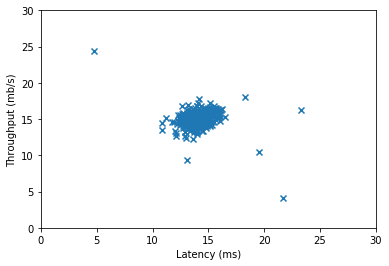

In [24]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

# Compute mean and varience

In [25]:
def estimateGaussian(X):
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

In [26]:
mu, sigma2 = estimateGaussian(X)

In [27]:
def multivariateGaussian(X, mu, sigma2):

    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

In [28]:
p = multivariateGaussian(X, mu, sigma2)

# Epsilon estimation

In [32]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [33]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


Text(0, 0.5, 'Throughput (mb/s)')

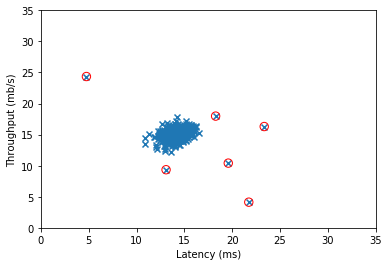

In [38]:
# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")